# **Business case: Understanding profitability in the US financial market**

### Marcela Ibarra Mora A0123197

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### **Get and calculate data**

In [2]:
#upload data
data = pd.read_csv('us2022q2a.csv')
data

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


In [3]:
#Get the firm and ticket info
name_columns = ["firm","Name","N","Class","Country of Origin","Type of Asset","Sector NAICS level 1","Exchange / Src","Sector Economatica","Sector NAICS last available","partind"]
df_firms = pd.read_csv('usfirms2022.csv', names = name_columns)
df_firms = df_firms.drop(["N","Class","Country of Origin","Type of Asset","Exchange / Src","Sector Economatica","Sector NAICS last available","partind"], axis=1)
df_firms

,firm,Name,Sector NAICS level 1
0,Ticker,Name,Sector NAICS\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [4]:
#merge both data frames
data = data.merge(df_firms, how='left', on='firm')

In [5]:
data['q'] = pd.PeriodIndex(data['q'],freq = "q")

In [6]:
data.set_index(['firm','q'],inplace=True)

In [7]:
data ["Market Value"] = data["originalprice"]*data["sharesoutstanding"]

In [8]:
data["Book Value"] = data["totalassets"]-data["totalliabilities"]

In [9]:
data["Ebit"] = data["revenue"] - data["cogs"] - data["sgae"]

In [10]:
data["revenue"] = data["revenue"].replace(0,np.nan)

In [11]:
data["Op. profit margin"] = data["Ebit"]/data["revenue"]  #Porcentaje

In [12]:
data["net_income"] = data["Ebit"] - data["otheropexp"] - data["incometax"] - data["finexp"] + data["extraincome"]

In [13]:
pd.options.display.float_format = "{:,.2f}".format
data["Profit margin"] = (data["net_income"] / data["revenue"])*100  #Porcentaje

In [14]:
#Divide by industry
data_industry1 = data.loc[(data["Sector NAICS level 1"] == "Wholesale Trade") | (data["Sector NAICS level 1"] == "Retail Trade")]
data_industry2 = data.loc[(data["Sector NAICS level 1"] == "Accommodation and Food Services") | (data["Sector NAICS level 1"] == "Administrative and Support and Waste Managment and Remedation Services") | (data["Sector NAICS level 1"] == "Arts, Entertainment, and Recreation") | (data["Sector NAICS level 1"] == "Educational Services") | (data["Sector NAICS level 1"] == "Health Care and Social Assistance") | (data["Sector NAICS level 1"] == "Information") | (data["Sector NAICS level 1"] == "Other Services (except Public Administration)") | (data["Sector NAICS level 1"] == "Profession, Scientific and Technical Services") | (data["Sector NAICS level 1"] == "Transportation and Warehousing")]
data_industry3 = data.loc[(data["Sector NAICS level 1"] == "Finance and Insurance") | (data["Sector NAICS level 1"] == "Real Estate and Rental and Leasing")]
data_industry4 = data.loc[(data["Sector NAICS level 1"] == "Manufacturing")]

## **General questions:**

By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?

Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

## **Specific questions**

About descriptive statistics

Considering the most recent financial quarter of the dataset:

Question 1

Show how many firms by industry there are in the sample?

In [15]:
print("Commercial",data_industry1.groupby(["firm"]).sum().shape)
print("Services",data_industry2.groupby(["firm"]).sum().shape)
print("Financial Services",data_industry3.groupby(["firm"]).sum().shape)
print("Manufacturing",data_industry4.groupby(["firm"]).sum().shape)

Commercial (231, 24)
Services (514, 24)
Financial Services (769, 24)
Manufacturing (1565, 24)


COMMERCIAL HAS 231 FIRMS

SERVICES HAS 514 FIRMS

FINANCIAL SERVICES HAS 769 FIRMS

MANUFACTURING HAS 1565 FIRMS

Question 2

For each industry (and for all industries), what can you say about the typical firm size in terms of market value?

In [16]:
#For all industries based on market value
data["Market Value"].median()

1576864.41918

FOR ALL INDUSTRIES, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 1,576,864.419 THOUSAND DOLLARS

How firm size (in market value) is distributed?

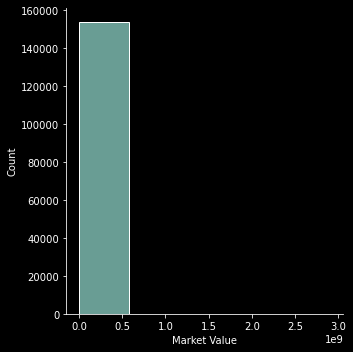

In [17]:
sns.displot(x ='Market Value',bins = 5,data=data)

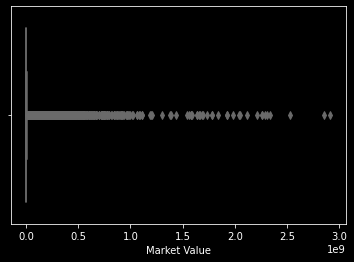

In [18]:
ax = sns.boxplot(x=data["Market Value"])

BASED ON THE HISTOGRAM AND THE BOXPLOT FROM ABOVE WE CAN NOTICE THAT THE DATA DOESN'T HAVE A NORMAL DISTRIBUTION BECAUSE MOST OF THE DATA LEAN ON THE LEFT SIDE OF THE GRAPHS, AROUND THE VALUES OF 0 AND 500,000,000 THOUSAND DOLLARS FOR MARKET VALUES, MEANING THAT MOST FIRMS ARE SMALL COMPARE TO THE AMOUNT OF FIRMS THAT ARE BIGGER

How much Market Value change within each industry?


In [19]:
#For all industries individualy based on market value
print("Commercial",data_industry1["Market Value"].median())
print("Services",data_industry2["Market Value"].median())
print("Financial Services",data_industry3["Market Value"].median())
print("Manufacturing",data_industry4["Market Value"].median())

Commercial 2083817.9707199999
Services 2184463.5194800003
Financial Services 1563695.9379000003
Manufacturing 1190025.10997


FOR THE COMMERCIAL INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 2,083,817.9707 THOUSAND DOLLARS

FOR THE SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 2,184,463.5194 THOUSAND DOLLARS

FOR THE FINANCIAL SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 1,563,695.9379 THOUSAND DOLLARS

FOR THE MANUFACTURING INDUSTRY, THE TYPICAL FIRM SIZE BASED ON MARKET VALUE IS 1,190,025.1099 THOUSAND DOLLARS

MEANING THE INDUSTRY WITH THE MOST VALUABLE FIRMS IS THE SERVICES INDUSTRY

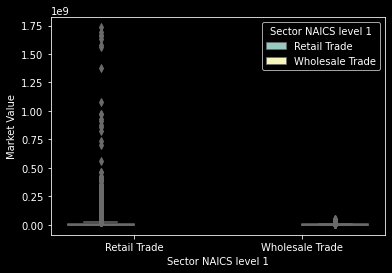

In [20]:
ax = sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry1, hue="Sector NAICS level 1",palette='Set3')

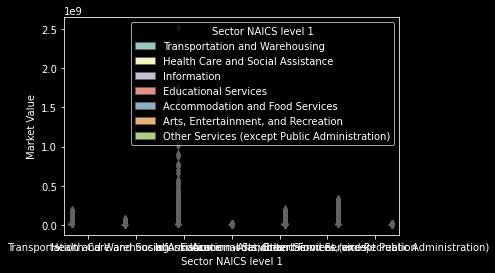

In [21]:
ax = sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry2, hue="Sector NAICS level 1",palette='Set3')

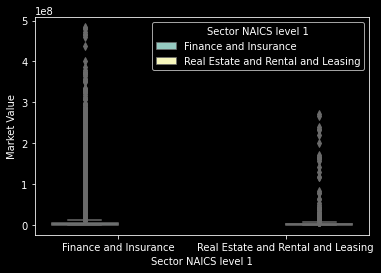

In [22]:
ax = sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry3, hue="Sector NAICS level 1",palette='Set3')

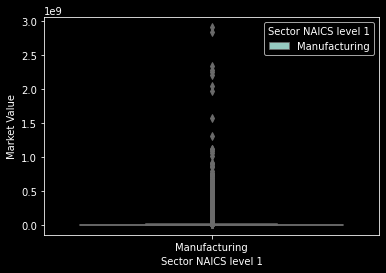

In [23]:
ax = sns.boxplot(x="Sector NAICS level 1",y="Market Value",data=data_industry4, hue="Sector NAICS level 1",palette='Set3')

Now for Book Value

For each industry (and for all industries), what can you say about the typical firm size in terms of book value?

In [24]:
#For all industries based on
data["Book Value"].median()

568889.0

FOR ALL INDUSTRIES, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 568,889.0 THOUSAND DOLLARS

How much Book Value change within each industry?

In [25]:
print("Commercial",data_industry1["Book Value"].median())
print("Services",data_industry2["Book Value"].median())
print("Financial Services",data_industry3["Book Value"].median())
print("Manufacturing",data_industry4["Book Value"].median())

Commercial 723936.0
Services 544419.0
Financial Services 893833.0
Manufacturing 363070.5


FOR THE COMMERCIAL INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 723,936.0 THOUSAND DOLLARS

FOR THE SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 544,419.0 THOUSAN DOLLARS

FOR THE FINANCIAL SERVICES INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 893,833.0 THOUSAND DOLLARS

FOR THE MANUFACTURING INDUSTRY, THE TYPICAL FIRM SIZE BASED ON BOOK VALUE IS 363,070.5 THOUSAND DOLLARS

MEANING THE INDUSTRY WERE THE FIRMS HAVE A BIGGER VALUE BASED ON THE BOOKS IS THE FINANCIAL SERVICES

Question 3

For each industry (and for all industries), what can you say about profit margin of firms?

Descriptive statistics of profit margin

In [26]:
#For all industries
data["Profit margin"].describe()

count       151,933.00
mean           -776.43
std          39,285.83
min     -10,140,324.14
25%              -0.78
50%               5.80
75%              14.44
max       4,819,100.00
Name: Profit margin, dtype: float64

In [27]:
#for each Industry
data_industry1["Profit margin"].describe()

count    11,545.00
mean         -4.51
std         265.76
min     -25,483.33
25%           0.85
50%           2.92
75%           5.87
max       3,327.01
Name: Profit margin, dtype: float64

In [28]:
data_industry2["Profit margin"].describe()

count       20,843.00
mean          -268.59
std         16,846.74
min     -2,270,600.00
25%             -4.65
50%              4.20
75%             10.09
max         59,755.09
Name: Profit margin, dtype: float64

In [29]:
data_industry3["Profit margin"].describe()

count     37,404.00
mean         -48.22
std        6,082.29
min     -980,500.00
25%            6.42
50%           18.76
75%           31.15
max      195,966.67
Name: Profit margin, dtype: float64

In [30]:
data_industry4["Profit margin"].describe()

count        57,319.00
mean         -1,747.79
std          59,805.17
min     -10,140,324.14
25%              -8.99
50%               4.13
75%               9.64
max       4,819,100.00
Name: Profit margin, dtype: float64

Plot(s) to illustrate how profit margin changes across industries.

In [31]:
lq_profit_ind1=data_industry1["Profit margin"].groupby(["firm"]).last()
lq_profit_ind2=data_industry2["Profit margin"].groupby(["firm"]).last()
lq_profit_ind3=data_industry3["Profit margin"].groupby(["firm"]).last()
lq_profit_ind4=data_industry4["Profit margin"].groupby(["firm"]).last()

Text(0.5, 1.0, 'Profit margin for Manufacturing')

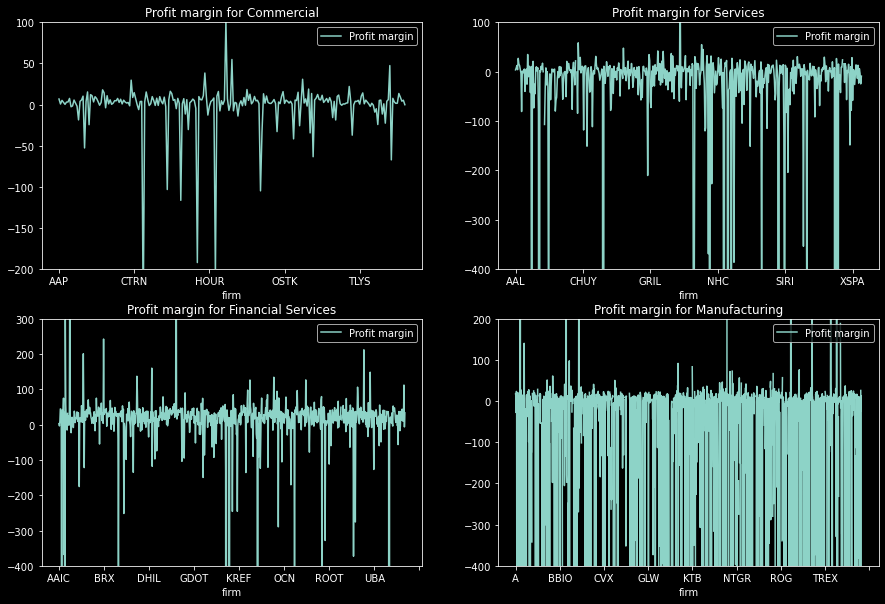

In [35]:
fig = plt.figure(figsize=(15, 10))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

lq_profit_ind1.plot(ax=ax1, legend=True)
lq_profit_ind2.plot(ax=ax2, legend=True)
lq_profit_ind3.plot(ax=ax3, legend=True)
lq_profit_ind4.plot(ax=ax4, legend=True)

ax1.set_ylim((-200,100))
ax2.set_ylim((-400,100))
ax3.set_ylim((-400,300))
ax4.set_ylim((-400,200))

ax1.set_title("Profit margin for Commercial")
ax2.set_title("Profit margin for Services")
ax3.set_title("Profit margin for Financial Services")
ax4.set_title("Profit margin for Manufacturing")

## **Interpreta esto con el market value^**

Question 4

Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [33]:
big_firms = data.groupby(["firm"]).last() 
big_firms_market = big_firms.nlargest(10,"Market Value")
big_firms_market

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,year,cto,Name,Sector NAICS level 1,Market Value,Book Value,Ebit,Op. profit margin,net_income,Profit margin
firm,,,,,,,,,,,,,,,,,,,,,
AAPL,"82,959,000.00","47,074,000.00","12,809,000.00",0.00,"-10,000.00",0.00,"3,624,000.00","336,309,000.00","278,202,000.00","24,991,000.00",...,"2,022.00",2.00,Apple Inc,Manufacturing,"2,212,837,946.32","58,107,000.00","23,076,000.00",0.28,"19,442,000.00",23.44
MSFT,"51,865,000.00","16,429,000.00","14,902,000.00",0.00,"-47,000.00",0.00,"3,747,000.00","364,840,000.00","198,298,000.00","2,749,000.00",...,"2,022.00",2.00,Microsoft Corp,Information,"1,920,840,080.06","166,542,000.00","20,534,000.00",0.40,"16,740,000.00",32.28
GOOGL,"69,685,000.00","30,104,000.00","20,128,000.00",0.00,"-439,000.00",0.00,"3,012,000.00","355,185,000.00","99,766,000.00",0.00,...,"2,022.00",2.00,Alphabet Inc,"Professional, Scientific, and Technical Services","1,435,042,441.95","255,419,000.00","19,453,000.00",0.28,"16,002,000.00",22.96
AMZN,"121,234,000.00","66,424,000.00","51,403,000.00","90,000.00","-5,557,000.00","425,000.00","-637,000.00","419,728,000.00","288,326,000.00",0.00,...,"2,022.00",2.00,"Amazon.Com, Inc",Retail Trade,"1,080,624,045.74","131,402,000.00","3,407,000.00",0.03,"-2,028,000.00",-1.67
TSLA,"16,934,000.00","12,700,000.00","1,628,000.00","142,000.00","18,000.00","18,000.00","205,000.00","68,513,000.00","31,276,000.00","1,532,000.00",...,"2,022.00",2.00,"Tesla, Inc",Manufacturing,"697,669,803.69","37,237,000.00","2,606,000.00",0.15,"2,259,000.00",13.34
BRK_A,"76,180,000.00",0.00,"131,662,000.00",0.00,"-379,000.00",0.00,"-12,106,000.00","909,860,000.00","448,631,000.00",NaN,...,"2,022.00",2.00,None,None,"601,513,922.30","461,229,000.00","-55,482,000.00",-0.73,"-43,755,000.00",-57.44
UNH,"80,332,000.00","73,200,000.00",0.00,0.00,"-129,000.00","467,000.00","1,466,000.00","230,172,000.00","153,967,000.00","5,592,000.00",...,"2,022.00",2.00,Unitedhealth Group Inc,Finance and Insurance,"481,873,080.45","76,205,000.00","7,132,000.00",0.09,"5,070,000.00",6.31
JNJ,"24,020,000.00","7,919,000.00","9,929,000.00","85,000.00","-273,000.00","-26,000.00","1,026,000.00","177,724,000.00","101,367,000.00","4,305,000.00",...,"2,022.00",2.00,Johnson & Johnson,Manufacturing,"467,100,134.23","76,357,000.00","6,172,000.00",0.26,"4,814,000.00",20.04
META,"28,822,000.00","5,192,000.00","15,272,000.00",0.00,"-172,000.00",0.00,"1,499,000.00","169,779,000.00","44,012,000.00","1,275,000.00",...,"2,022.00",2.00,"Meta Platforms, Inc","Professional, Scientific, and Technical Services","436,394,646.15","125,767,000.00","8,358,000.00",0.29,"6,687,000.00",23.20


Question 5

Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [34]:
big_firms_book = big_firms.nlargest(10,"Book Value")
big_firms_book

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,year,cto,Name,Sector NAICS level 1,Market Value,Book Value,Ebit,Op. profit margin,net_income,Profit margin
firm,,,,,,,,,,,,,,,,,,,,,
BRK_A,"76,180,000.00",0.00,"131,662,000.00",0.00,"-379,000.00",0.00,"-12,106,000.00","909,860,000.00","448,631,000.00",NaN,...,"2,022.00",2.00,None,None,"601,513,922.30","461,229,000.00","-55,482,000.00",-0.73,"-43,755,000.00",-57.44
JPM,"18,646,000.00","3,518,000.00",0.00,0.00,"-4,263,000.00",0.00,"2,216,000.00","3,841,314,000.00","3,555,171,000.00",NaN,...,"2,022.00",2.00,Jpmorgan Chase & Co,Finance and Insurance,"330,236,976.84","286,143,000.00","15,128,000.00",0.81,"8,649,000.00",46.39
BAC,"14,975,000.00","2,531,000.00",0.00,0.00,"-5,552,000.00",0.00,"645,000.00","3,111,606,000.00","2,842,488,000.00",NaN,...,"2,022.00",2.00,Bank Of America Corp,Finance and Insurance,"250,810,716.83","269,118,000.00","12,444,000.00",0.83,"6,247,000.00",41.72
GOOGL,"69,685,000.00","30,104,000.00","20,128,000.00",0.00,"-439,000.00",0.00,"3,012,000.00","355,185,000.00","99,766,000.00",0.00,...,"2,022.00",2.00,Alphabet Inc,"Professional, Scientific, and Technical Services","1,435,042,441.95","255,419,000.00","19,453,000.00",0.28,"16,002,000.00",22.96
C,"15,630,000.00","3,666,000.00",0.00,0.00,"-6,235,000.00",0.00,"1,182,000.00","2,380,904,000.00","2,181,278,000.00",NaN,...,"2,022.00",2.00,Citigroup Inc,Finance and Insurance,"89,069,275.56","199,626,000.00","11,964,000.00",0.77,"4,547,000.00",29.09
XOM,"111,265,000.00","76,299,000.00","6,981,000.00","7,154,000.00","3,572,000.00","194,000.00","6,359,000.00","367,774,000.00","183,266,000.00","7,367,000.00",...,"2,022.00",2.00,Exxon Mobil Corp,Manufacturing,"356,916,372.30","184,508,000.00","27,985,000.00",0.25,"17,850,000.00",16.04
WFC,"11,556,000.00","1,358,000.00",0.00,0.00,"-6,466,000.00",0.00,"613,000.00","1,881,142,000.00","1,701,349,000.00",NaN,...,"2,022.00",2.00,Wells Fargo & Company,Finance and Insurance,"148,468,097.36","179,793,000.00","10,198,000.00",0.88,"3,119,000.00",26.99
MSFT,"51,865,000.00","16,429,000.00","14,902,000.00",0.00,"-47,000.00",0.00,"3,747,000.00","364,840,000.00","198,298,000.00","2,749,000.00",...,"2,022.00",2.00,Microsoft Corp,Information,"1,920,840,080.06","166,542,000.00","20,534,000.00",0.40,"16,740,000.00",32.28
CVX,"68,762,000.00","46,321,000.00","4,563,000.00","1,759,000.00","-80,000.00","129,000.00","4,288,000.00","257,936,000.00","103,374,000.00","3,230,000.00",...,"2,022.00",2.00,Chevron Corp,Manufacturing,"283,397,412.37","154,562,000.00","17,878,000.00",0.26,"11,622,000.00",16.90


## **About statistical modeling**

Selected Industry: Commercial

Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.(stock original price,quarter, adjprice)
1. Do histograms for each factor/variables and interpret them

2. Do plots to visualize the possible relationship each factor might have with the dependent variable.  (correlaciones)

3. Show descriptive statistics of these factors  (.describe)

Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model ()
1. Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size

2. For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

3. You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test